# Exercise 3 [10.0]

## Occupancy grid mapping

The aim of this assignment is to implement a 2D occupancy grid mapping algorithm as described in the lecture. We provide data recorded by a robot using a 2D laser scanner in an indoor environment. 

The raw data is arranged in the following manner:

- `poses.data`: contains the **known** robot poses as it moves around the environment. Each line corresponds to the pose of the robot at a time instant

- `ranges.data`: contains 2d laser range measurements recorded by the robot. Each line corresponds to the range measurements taken from the corresponding robot poses.

---

### Log odds to probability [2.0]

The occupancy calculations are usually performed using the log odds. We will need to convert between log odds and probabilities in this exercise. Implement the `logodds2prob` and `prob2logodds` functions. Verify that the conversion functions are correct for some test input. 

In [1]:
import ex3 as ex
print(ex.prob2logodds(0))
print(ex.prob2logodds(0.5))
print(ex.prob2logodds(0.9999999999))
print(ex.logodds2prob(0))
print(ex.logodds2prob(-float("inf")))
print(ex.logodds2prob(float("inf")))

-inf
0.0
23.025850847100088
0.5
0.0
1.0


C:\Users\faroo\Downloads\ex03-grip\assignment\ex3.py:64: RuntimeWarning: divide by zero encountered in log
  logodds = np.log(p / (1 - p))


---
### Inverse sensor model [2.0]

The occupancy grid mapping relies on as inverse sensor model to update the occupancy of a cell in the grid. For this exercise, we consider a simple sensor model, where the occupancy of cell $m_i$ is $P_{occ}$ if the measurement $z_t$ falls in that cell, otherwise the occupancy is $P_{free}$. 

However, if the cell $m_i$ is not in the perception field, the occupancy will be $P_{prior}$.

Use the  following probabilities in the implementation:
$$P_{occ} = 0.85, P_{free} = 0.4, P_{prior} = 0.5 $$

Implement the inverse sensor model function and verify that it is correct for some test input. 

In [3]:
endpoint = [200,200]
cell1 = [100,250]
prob_occ = 0.85
prob_free = 0.4
prob_cell1 = ex.inv_sensor_model(cell1, endpoint, prob_occ, prob_free)
print(prob_cell1)
cell2 = [200,200]
prob_cell2 = ex.inv_sensor_model(cell2, endpoint, prob_occ, prob_free)
print(prob_cell2)

[[100.   250.     0.4 ]
 [101.   249.     0.4 ]
 [102.   249.     0.4 ]
 [103.   248.     0.4 ]
 [104.   248.     0.4 ]
 [105.   247.     0.4 ]
 [106.   247.     0.4 ]
 [107.   246.     0.4 ]
 [108.   246.     0.4 ]
 [109.   245.     0.4 ]
 [110.   245.     0.4 ]
 [111.   244.     0.4 ]
 [112.   244.     0.4 ]
 [113.   243.     0.4 ]
 [114.   243.     0.4 ]
 [115.   242.     0.4 ]
 [116.   242.     0.4 ]
 [117.   241.     0.4 ]
 [118.   241.     0.4 ]
 [119.   240.     0.4 ]
 [120.   240.     0.4 ]
 [121.   239.     0.4 ]
 [122.   239.     0.4 ]
 [123.   238.     0.4 ]
 [124.   238.     0.4 ]
 [125.   237.     0.4 ]
 [126.   237.     0.4 ]
 [127.   236.     0.4 ]
 [128.   236.     0.4 ]
 [129.   235.     0.4 ]
 [130.   235.     0.4 ]
 [131.   234.     0.4 ]
 [132.   234.     0.4 ]
 [133.   233.     0.4 ]
 [134.   233.     0.4 ]
 [135.   232.     0.4 ]
 [136.   232.     0.4 ]
 [137.   231.     0.4 ]
 [138.   231.     0.4 ]
 [139.   230.     0.4 ]
 [140.   230.     0.4 ]
 [141.   229.   

---
### Occupancy grid mapping algorithm [6.0]:

Implement the occupancy grid mapping algorithm as described in lecture slides. 

We provide some functions to make the implemntation easier.

- `ranges2cells` converts the raw measurements acquired by the robot (*ranges_raw*) into the correspoding cells of the gridmap.
- `poses2cells` converts the raw poses of the robot (*poses_raw*) into the correspoding cells of the gridmap.
- `bresenham` returns all the cells along a straigh line between two points in the gridmap.

Other parameters you may need in the implemntation are provided below.

Implement the `grid_mapping_with_known_poses` functionn and compute the resulting occupancy grid map using all the measurements provided in the data.

Plot the final occupancy gridmap using the `plot_gridmap` function. 


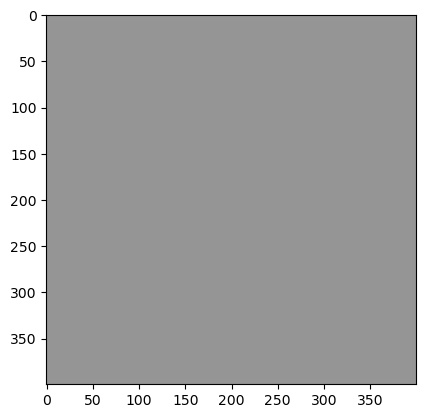

In [4]:
import ex3 as ex
import numpy as np
%matplotlib inline

map_size = 100
map_res = 0.25
prior = 0.5

# load data
ranges_raw = np.loadtxt("ranges.data", delimiter=',', dtype='float')
poses_raw = np.loadtxt("poses.data", delimiter=',', dtype='float')

# initialize gridmap
occ_gridmap = ex.init_gridmap(map_size, map_res)+prior
ex.plot_gridmap(occ_gridmap)

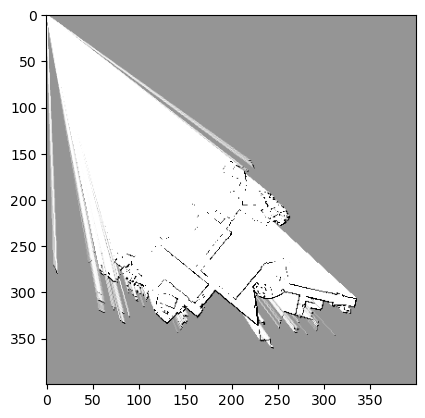

In [5]:
occ_gridmap = ex.grid_mapping_with_known_poses(poses_raw, ranges_raw, map_res, occ_gridmap, prior, prob_free, prob_occ)
ex.plot_gridmap(occ_gridmap)